In [ ]:
pip install scanpy metacells matplotlib seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install anndata

In [ ]:
pip install --upgrade metacells

In [ ]:
pip install python-igraph louvain

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


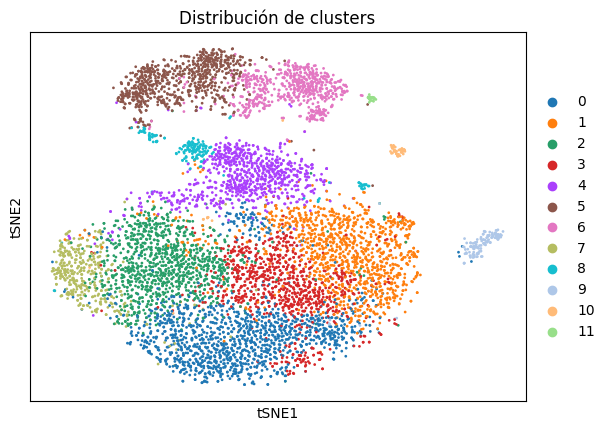

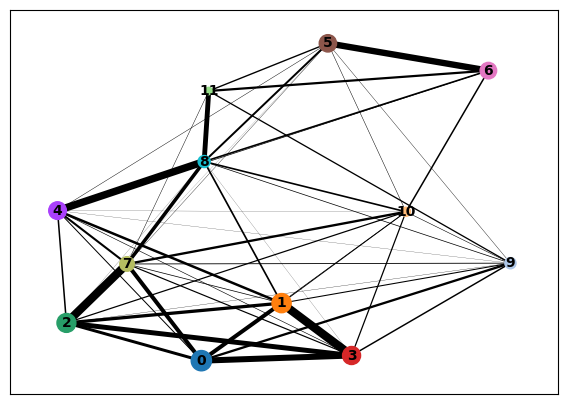

In [ ]:
import scanpy as sc
import metacells as mc
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar datos
file_path = '/content/drive/MyDrive/Metacell/Supercluster_Choroid_plexus.h5ad'
adata = sc.read_h5ad(file_path)

#Preprocesamiento básico
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')

#Crear de un gráfico KNN
sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_pca")

sc.tl.louvain(adata, resolution=1.0)

sc.tl.tsne(adata)
sc.pl.tsne(adata, color='louvain', title="Distribución de clusters")
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
sc.tl.paga(adata)
sc.pl.paga(adata)
